<a href="https://colab.research.google.com/github/augustolimald/cpa/blob/main/Fibonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Augusto César Rodrigues Lima

**Matricula**: 201910386

**Turma**: 14A

**Link do repositório GitHub:** https://github.com/augustolimald/cpa

# Funções Auxiliares



## Aumentar Recursão

O Google Collab estava dando erro para chamadas em arrays acima de 1000 elementos. A linha abaixo aumenta o threshold para que isso não aconteça

In [54]:
import sys
sys.setrecursionlimit(1500)


## Importações e Variáveis globais

In [55]:
import numpy as np

global_1=0

## Tempo de Execução

In [56]:
import time

def currentTime():
  return round(time.time() * 1000)

def calculateExecutionTime(number, algorithm):
  startTime = currentTime()
  algorithm(number)
  endTime = currentTime()
  return endTime - startTime

## Gerar Gráficos

In [57]:
import matplotlib.pyplot as plt

def generateGraph(title, xlabel, ylabel, dataset):
  for data in dataset:
    plt.plot(np.array(data['xarray']), np.array(data['yarray']), label=data['label'], color=data['color'])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

# Funções Fibonacci




## Recursivo

In [58]:
def recursiveFibonacci(number):
  if number == 0:
    return 0
  if number == 1:
    return 1
  return recursiveFibonacci(number - 1) + recursiveFibonacci(number - 2)

## Recursivo com Programação Dinâmica

In [59]:
def getFibonacciFromMemory(number, memory):
  if memory[number] is None:
    memory[number] = getFibonacciFromMemory(number - 1, memory) + getFibonacciFromMemory(number - 2, memory)
  
  return memory[number]
  

def dynamicFibonacci(number):
  memory = [None for n in range(number + 1)]
  memory[0] = 0
  memory[1] = 1

  return getFibonacciFromMemory(number, memory)

# Comparação

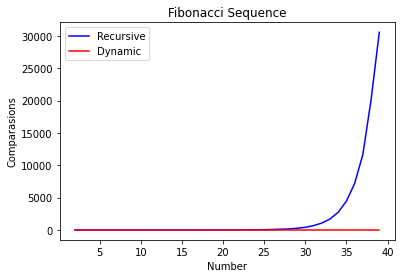

In [60]:
xarray = []
recursiveData = []
dynamicData = []

for number in range(2, 40):
  xarray.append(number)
  recursiveData.append(calculateExecutionTime(number, recursiveFibonacci))
  dynamicData.append(calculateExecutionTime(number, dynamicFibonacci))


generateGraph('Fibonacci Sequence', 'Number', 'Comparasions', [
  {
    'label': 'Recursive',
    'color': 'blue',
    'xarray': xarray,
    'yarray': recursiveData
  },

  {
    'label': 'Dynamic',
    'color': 'red',
    'xarray': xarray,
    'yarray': dynamicData
  }
])